# Core Sensitivity Testing

In [ ]:
# =============================================================================
# DEVELOPMENT MODE TOGGLE
# =============================================================================
USE_LOCAL_SOURCE = False  # <-- TOGGLE THIS

if USE_LOCAL_SOURCE:
    import sys
    from pathlib import Path
    local_path = str(Path.cwd().parent)
    if local_path not in sys.path:
        sys.path.insert(0, local_path)
    print(f"📁 LOCAL SOURCE MODE: Loading from {local_path}/ras_commander")
else:
    print("📦 PIP PACKAGE MODE: Loading installed ras-commander")

# Import ras-commander
from ras_commander import *

# Additional imports
import h5py
import numpy as np
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
from shapely.geometry import Point, LineString, Polygon
import xarray as xr
from pathlib import Path

# Verify which version loaded
import ras_commander
print(f"✓ Loaded: {ras_commander.__file__}")

In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from ras_commander import RasExamples, init_ras_project, RasCmdr, RasPlan, RasGeo

# Step 1: Initialize RasExamples and extract the BaldEagleCrkMulti2D project

RasExamples.extract_project(["BaldEagleCrkMulti2D"], output_path="example_projects_101_Core_Sensitivity")

# Use Path.cwd() to get the current working directory in a Jupyter Notebook
current_directory = Path.cwd()
project_path = current_directory / "example_projects" / "BaldEagleCrkMulti2D"

# Step 2: Initialize the RAS Project Folder using init_ras_project (from ras_commander)
init_ras_project(project_path, "6.6")

# Step 3: Initialize a DataFrame to store execution results
results = []

# Step 4: Run sensitivity analysis for Plan 03 with core counts 1-8
plan_number = '03'
print(f"Running sensitivity analysis for Plan {plan_number}")

# Clear geompre files before running the plan
plan_path = RasPlan.get_plan_path(plan_number)
RasGeo.clear_geompre_files(plan_path)

for cores in range(1, 5):
    print(f"Running with {cores} core(s)")
    # Set core count for this plan
    RasPlan.set_num_cores(plan_number, cores)
    
    # Time the execution of the plan
    start_time = time.time()
    RasCmdr.compute_plan(plan_number)
    execution_time = time.time() - start_time
    
    # Store the results
    results.append({
        "plan_number": plan_number,
        "cores": cores,
        "execution_time": execution_time
    })
    
    print(f"Execution time: {execution_time:.2f} seconds")

print("Sensitivity analysis complete")

# Step 5: Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Optionally, save the results to a CSV file
results_df.to_csv("core_sensitivity_results.csv", index=False)


2025-04-09 08:50:59 - ras_commander.RasExamples - INFO - Found zip file: d:\GitHub\ras-commander\examples\Example_Projects_6_6.zip
2025-04-09 08:50:59 - ras_commander.RasExamples - INFO - Loading project data from CSV...
2025-04-09 08:50:59 - ras_commander.RasExamples - INFO - Loaded 68 projects from CSV.
2025-04-09 08:50:59 - ras_commander.RasExamples - INFO - ----- RasExamples Extracting Project -----
2025-04-09 08:50:59 - ras_commander.RasExamples - INFO - Extracting project 'BaldEagleCrkMulti2D'
2025-04-09 08:50:59 - ras_commander.RasExamples - INFO - Project 'BaldEagleCrkMulti2D' already exists. Deleting existing folder...
2025-04-09 08:50:59 - ras_commander.RasExamples - INFO - Existing folder for project 'BaldEagleCrkMulti2D' has been deleted.
2025-04-09 08:51:01 - ras_commander.RasExamples - INFO - Successfully extracted project 'BaldEagleCrkMulti2D' to d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-09 08:51:01 - ras_commander.RasPrj - INFO - Init

Running sensitivity analysis for Plan 03
Running with 1 core(s)


2025-04-09 08:58:06 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 03
2025-04-09 08:58:06 - ras_commander.RasCmdr - INFO - Total run time for plan 03: 424.31 seconds
2025-04-09 08:58:06 - ras_commander.RasUtils - INFO - Constructed plan file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03
2025-04-09 08:58:06 - ras_commander.RasUtils - INFO - Successfully updated file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03
2025-04-09 08:58:06 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-09 08:58:06 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:
2025-04-09 08:58:06 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" 

Execution time: 424.34 seconds
Running with 2 core(s)


2025-04-09 09:02:18 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 03
2025-04-09 09:02:18 - ras_commander.RasCmdr - INFO - Total run time for plan 03: 252.47 seconds
2025-04-09 09:02:18 - ras_commander.RasUtils - INFO - Constructed plan file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03
2025-04-09 09:02:18 - ras_commander.RasUtils - INFO - Successfully updated file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03
2025-04-09 09:02:18 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-09 09:02:18 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:
2025-04-09 09:02:18 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" 

Execution time: 252.53 seconds
Running with 3 core(s)


2025-04-09 09:06:39 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 03
2025-04-09 09:06:39 - ras_commander.RasCmdr - INFO - Total run time for plan 03: 260.34 seconds
2025-04-09 09:06:39 - ras_commander.RasUtils - INFO - Constructed plan file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03
2025-04-09 09:06:39 - ras_commander.RasUtils - INFO - Successfully updated file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03
2025-04-09 09:06:39 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-09 09:06:39 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:
2025-04-09 09:06:39 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" 

Execution time: 260.38 seconds
Running with 4 core(s)


2025-04-09 09:10:55 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 03
2025-04-09 09:10:55 - ras_commander.RasCmdr - INFO - Total run time for plan 03: 256.51 seconds


Execution time: 256.55 seconds
Sensitivity analysis complete


NOTES FOR REVISIONS:
- Use HDF compute summary to show the time for each preprocesS/unsteady compute/postprocess step. 
- First, run preprocessor and then toggle options to only run unsteady compute and postprocess. 
- Plot each step separately. 



results_df DataFrame (time is in seconds):


,plan_number,cores,execution_time
0,3,1,424.342272
1,3,2,252.529661
2,3,3,260.380589
3,3,4,256.551776


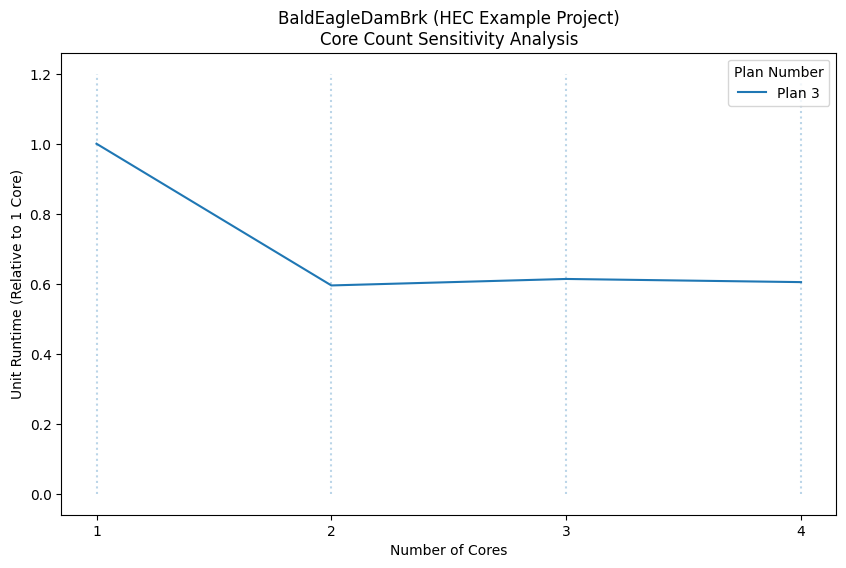

In [4]:
# Optionally, load the results from a CSV file
results_df = pd.read_csv("core_sensitivity_results.csv")

# Display the results dataframe for verification
print("results_df DataFrame (time is in seconds):")
display(results_df)

# Step 6: Calculate unit runtime (based on 1 core execution time)
results_df['unit_runtime'] = results_df.groupby('plan_number')['execution_time'].transform(lambda x: x / x.iloc[0])

# Get the project name from the ras object
project_name = ras.project_name

# Step 7: Plot a line chart for unit runtime vs. cores for each plan
plt.figure(figsize=(10, 6))
for plan in results_df['plan_number'].unique():
    plan_data = results_df[results_df['plan_number'] == plan]
    plt.plot(plan_data['cores'], plan_data['unit_runtime'], label=f"Plan {plan}")

plt.xlabel("Number of Cores")
plt.ylabel("Unit Runtime (Relative to 1 Core)")
plt.title(f"{project_name} (HEC Example Project)\nCore Count Sensitivity Analysis")
plt.legend(title="Plan Number")
plt.grid(False)
plt.vlines([1,2,3,4], ymin=0, ymax=1.2, linestyles='dotted', alpha=0.3)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show()


